# PHYS 2820
## Review: Lectures 7-13

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import sympy as sp
sp.init_printing(use_latex='mathjax') # pretty printing with LaTeX
from scipy.integrate import odeint
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import tqdm
from ipywidgets import interactive, fixed

- - -
# Simple Harmonic Motion
## Lecture 7

 *periodic* -- repeating after a given **period** T

### Newton's Law

From Newton's Second Law we can write down an equation of motion for the block:

$$\frac{d^2 x}{d t^2} = - \frac{k}{m} x = -\omega_0^2 x$$

where the angular frequency $\omega_0$ is defined by

$$ \omega_0^2 = \frac{k}{m}.$$

Even thought the position and velocity are constantly changing the total energy $E$ should remain a constant.

$$ E = \frac{1}{2}m v^2 + \frac{1}{2} k x^2 = \frac{1}{2} k A^2 $$

where the two terms are the kinetic and potential energy.

### Modified Euler Algorithms

#### Euler-Cromer algorithm

Euler's method is

$$\begin{align} 
x(t + \Delta t) &= x(t) + v(t) \Delta t \\
v(t + \Delta t) &= v(t) + a(t) \Delta t 
\end{align}
$$

We can make a very simple change and write

$$\begin{align} 
x(t + \Delta t) &= x(t) + v(t+\Delta t) \Delta t \\
v(t + \Delta t) &= v(t) + a(t) \Delta t 
\end{align}
$$

This modified Euler's method is called the Euler-Cromer algorithm. The only difference is the computed velocity at the end of the interval, $v(t + \Delta t)$ is used to compute the new position $x(t + \Delta t)$.

With this modified Euler method, we first updating the velocity `v` and then using that to update the position `x`.

In the Euler-Cromer method, energy (when averaged over one period of an oscillation) is conserved. This energy conservation is a key property of the numerical stability of this new method.

# Damped and Forced Pendulums
## Lecture 8

## The Motion of a Pendulum




$$\frac{d^2\theta}{dt^2} = - \frac{g}{L} \sin \theta$$

This equation is an example of a nonlinear equation because $\sin\theta$ rather than $\theta$ appears. Most nonlinear equations do not have analytical solutions in terms of well-known functions, and this equation is no exception.

However, if the amplitude of the pendulum oscillations is sufficiently small, then $\sin \theta \approx \theta$, and this equation reduces to

$$\frac{d^2\theta}{dt^2} \approx - \frac{g}{L}  \theta \quad \quad (\theta \ll 1)$$


### Numerical Solution

We can write a program to simulate and visualize the motion of a pendulum problem, `SimplePendulumApp`. The function `SimplePendulumStepper` implements solves the dynamical equations using the Euler-Richardson algorithm.

In [4]:
## constants
g = 9.8
L = g / 9  # L chosen so that ω0=3
ω0 = np.sqrt(g/L)
m = 1

In [6]:
def SimplePendulumStepper(x0=1, v0=0, dt=0.1, tmax=10):
    """
    Solve for motion of a pendulum using Euler-Richardson
    """
    
    # initialize the model
    t = 0
    x = x0
    v = v0
    
    while True:
        model = {'t': t, 'x': x, 'v': v}
        yield model # return the model state back to the caller
    
        if t > tmax:
            break
            
        # calculate acceleration (force / mass)
        a = - (g/L) * np.sin(x) 
        
        # use the Euler-Richardson algorithm to update the state of the model
        vmid = v + 1/2 * a * dt
        xmid = x + 1/2 * v * dt
        amid = - (g/L) * np.sin(xmid)
        
        v = v + amid * dt
        x = x + vmid * dt
        t = t + dt

To visualize the results, we can plot the angle $\theta$ as function of time.

In [8]:
def SimplePendulumPlotter(data):
    fig, axs = plt.subplots(3, 1, figsize=(10,6))
    
    θ0 = data.iloc[0].x
    x_analytical = θ0 * np.cos(ω0*data.t)
    v_analytical = - ω0*θ0 * np.sin(ω0*data.t)
    
    axs[0].plot(data.t, data.x, label='Numerical')
    axs[0].plot(data.t, x_analytical, label='Analytical')
    axs[0].set_ylabel("θ")
    axs[0].legend()
    
    axs[1].plot(data.t, data.v)
    axs[1].plot(data.t, v_analytical)
    axs[1].set_ylabel("dθ/dt")
    
    KE = 1/2 * m * L**2 * data.v**2
    PE = m * g * L * (1 - np.cos(data.x))
    E = KE + PE
    axs[2].plot(data.t, KE, label='KE')
    axs[2].plot(data.t, PE, label='PE')
    axs[2].plot(data.t, E, label='E')
    axs[2].set_ylabel("E (J)")
    axs[2].legend()
    
    axs[2].set_xlabel("t (s)")

In [9]:
def SimplePendulumApp(θ0=0.2, dt=0.05):
   
    # set up the model
    stepper = SimplePendulumStepper(x0=θ0, dt=dt)
    
    # iterate the model in time
    data = pd.DataFrame(stepper)
    
    # visualize the results
    SimplePendulumPlotter(data)
    
    return data

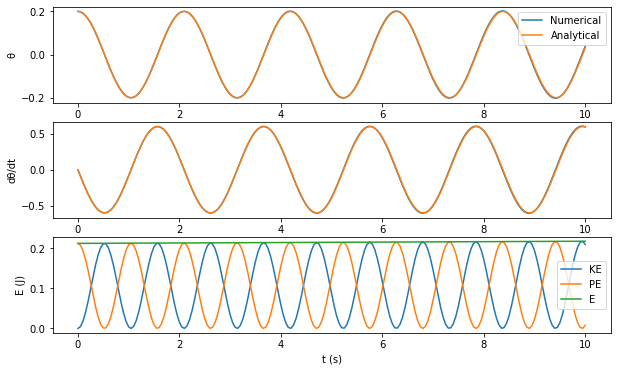

In [10]:
SimplePendulumApp(); # ";" to prevent data from being displayed

See Lab #4 for more examples.

## Damped Harmonic Oscillator


\begin{align}
\frac{d^2\theta}{dt^2} &= - \frac{g}{L} \sin(\theta) -\gamma \frac{d \theta}{dt} \;. \\
\end{align}

### Numerical solution for a damped pendulum

In [ ]:
def DampedPendulumStepper(γ=1, x0=1, v0=0, dt=0.01, tmax=10):
    """
    Solve for motion of a damped pendulum using Euler-Richardson
    """
    
    # initialize the model
    t = 0
    x = x0
    v = v0
    
    while True:
        model = {'t': t, 'x': x, 'v': v}
        yield model # return the model state back to the caller
    
        if t > tmax:
            break
            
        # calculate acceleration (force / mass)
        a = - (g/L) * np.sin(x) - γ * v
        
        # use the Euler-Richardson algorithm to update the state of the model
        vmid = v + 1/2 * a * dt
        xmid = x + 1/2 * v * dt
        amid = - (g/L) * np.sin(xmid) - γ * vmid
        
        v = v + amid * dt
        x = x + vmid * dt
        t = t + dt

In [ ]:
def DampedPendulumPlotter(data, label=' ', axs=None):
    if axs is None:
        fig, axs = plt.subplots(3, 1, figsize=(10,6))
    
    axs[0].plot(data.t, data.x, label=label)
    axs[0].set_ylabel("θ")
    axs[0].legend()
    
    axs[1].plot(data.t, data.v)
    axs[1].set_ylabel("dθ/dt")
    
    KE = 1/2 * m * L**2 * data.v**2
    PE = m * g * L * (1 - np.cos(data.x))
    E = KE + PE
    axs[2].plot(data.t, E)
    axs[2].set_ylim(ymin=0, ymax=E[0]*1.1)
    axs[2].set_ylabel("E (J)")
    
    axs[2].set_xlabel("t (s)")

In [ ]:
def DampedPendulumApp(γ=0.5, θ0=0.2):
    fig, axs = plt.subplots(3, 1, figsize=(10,6))
    
    # solve for an undamped pendulum
    stepper = DampedPendulumStepper(x0=θ0, γ=0)
    data = pd.DataFrame(stepper)
    DampedPendulumPlotter(data, label='Undamped', axs=axs)

    # solve for an undamped pendulum
    stepper = DampedPendulumStepper(x0=θ0, γ=γ)
    data = pd.DataFrame(stepper)
    DampedPendulumPlotter(data, label='Damped', axs=axs)

## Response to External Forces

\begin{align}
\frac{d^2 x}{dt^2} &= - \omega_0^2 x -\gamma \frac{d x}{dt}  + \frac{1}{m}F(t)\;.
\end{align}

The time dependence of F(t) is aribitrary. Because many forces in nature are periodic, we first consider the form

\begin{align}
\frac{1}{m}F(t) &= A_0 \cos(\omega t)\;,
\end{align}

where $\omega$ is the angular frequency of the driving force.


In [ ]:
def DrivenDampedOscillatorStepper(x0=1, v0=0, γ=1, A=0, ω=0,
                                  dt=0.01, tmax=10):
    """
    Solve for motion of a driven damped oscillator using Euler-Richardson
    """
    
    # initialize the model
    t = 0
    x = x0
    v = v0
    
    while True:
        model = {'t': t, 'x': x, 'v': v}
        yield model # return the model state back to the caller
    
        if t > tmax:
            break
            
        # calculate acceleration (force / mass)
        a = - ω0**2 * x - γ * v + A * np.cos(ω*t)
        
        # use the Euler-Richardson algorithm to update the state of the model
        vmid = v + 1/2 * a * dt
        xmid = x + 1/2 * v * dt
        tmid = t + 1/2 * dt
        amid = - ω0**2 * xmid - γ * vmid + A * np.cos(ω*tmid)
        
        v = v + amid * dt
        x = x + vmid * dt
        t = t + dt

In [ ]:
def DrivenDampedOscillatorPlotter(data):
    fig, axs = plt.subplots(1, 2, figsize=(8,4))
    
    axs[0].plot(data.t, data.x, label='x')
    axs[0].plot(data.t, data.v, label='v')
    axs[0].set_ylabel("x or v")
    axs[0].set_xlabel("t")
    axs[0].legend()
    
    axs[1].plot(data.x, data.v)
    axs[1].set_ylabel("v")
    axs[1].set_xlabel("x")

In [ ]:
def DrivenDampedOscillatorApp(x0=1, v0=0, γ=0.5, ω=2, tmax=20):
    A = 1
    
    stepper = DrivenDampedOscillatorStepper(x0=x0, v0=v0,
                                            γ=γ, A=A, ω=ω,
                                            tmax=tmax)
    data = pd.DataFrame(stepper)
    DrivenDampedOscillatorPlotter(data)

# Lorenz Model and the Butterfly Effect
## Lecture 9

<img src="http://www.azquotes.com/picture-quotes/quote-when-a-butterfly-flutters-its-wings-in-one-part-of-the-world-it-can-eventually-cause-edward-norton-lorenz-107-79-51.jpg" style="margin: 0 auto;" >

### Comparison of two *identical* simluations
<img src="http://www.stsci.edu/~lbradley/seminar/images/lorenz.gif" width="50%" style="margin: 0 auto;" alt="">

**chaotic** sensitive dependence on initial conditions. 

## Lorenz Model

- Simpler way to produce complex behaviour observed
- System of three non-linear equations
- Inspired by physics involved in fluid convection




#### Equations in Lorenz Model

$$ \frac{\mathrm{d}x}{\mathrm{d}t} = \sigma (y-x) $$

$$ \frac{\mathrm{d}y}{\mathrm{d}t} = -xz + rx-y $$

$$ \frac{\mathrm{d}z}{\mathrm{d}t} = xy -bz $$

Numerically we can solve this model as follows:
$$ x_{i+1}  = x_i + \sigma (y_i-x_i) \Delta t $$
 
$$ y_{i+1} = y_i + (-x_i z_i + r x_i - y_i) \Delta t $$
 
$$ z_{i+1} = z_i + ( x_i y_i - b z_i) \Delta t $$
 


In [11]:
# constants
b = 8/3
r = 25
σ = 10

def LorenzStepper(x0=1, y0=0, z0=0, dt=0.001, tmax=50):
    """
    Solve the Lorenz equations using Euler's method
    """
    
    # initialize the model
    t = 0
    x = x0
    y = y0
    z = z0
    
    while True:
        model = {'t': t, 'x': x, 'y': y, 'z': z}
        yield model # return the model state back to the caller
    
        if t > tmax:
            break
            
        # use the Euler method to update the state of the model
        xnew = x + σ*(y-x)*dt
        ynew = y + (-x*z + r*x - y)*dt
        znew = z + (x*y - b*z)*dt
        x = xnew
        y = ynew
        z = znew
        t = t + dt

In [12]:
def LorenzPlotter(data):
 
    plt.plot(data.t, data.x) 
    plt.xlim(0, 50) 
    plt.ylim(-30, 30) 
    plt.xlabel('time') 
    plt.ylabel('z') 
    plt.title('Variation of z as a function of time')


In [16]:
def LorenzApp():
    plt.subplots(figsize=(12,5))
    
    stepper = LorenzStepper(x0=1.0000)
    data = pd.DataFrame(stepper)
    LorenzPlotter(data)
    
    stepper = LorenzStepper(x0=1.0001)
    data = pd.DataFrame(stepper)
    LorenzPlotter(data)
    
    return data

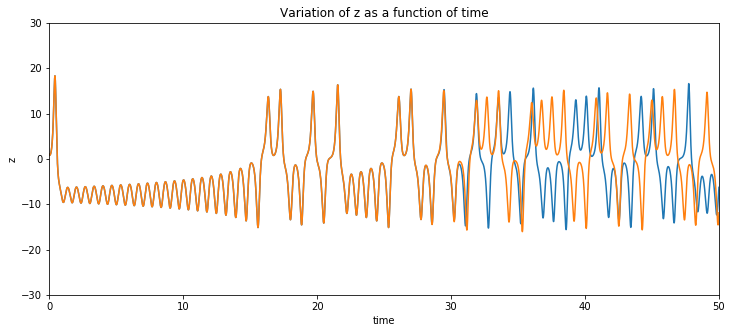

In [17]:
data = LorenzApp()

# Numerical Differentiation and Integration
## Lecture 10

## Derivative schemes

Approximations to a derivative can be obtained by expanding a function using Taylor series. Here are three schemes for calculating numerically the derivative of a continuous functions. These are called the forward, backward and centered difference schemes. 

#### forward difference

$$ \frac{f(x+h )-f(x)}{h}$$

#### backward difference

$$ \frac{f(x) - f(x - h)}{h}$$

#### centered difference
$$ \frac{f(x+h)-f(x-h)}{2 h}$$

where $f(x)$ is some smooth function at we are approximating the derivative at the point $x=x_0$.


## Differentiating data

Suppose we have data e.g. velocity versus time, where the independent variable is equally spaced between points.

|-|$t$|$v$|-|
|--|--|--|--|
|$t_0$|0.1|3.0|$v_0$ |
|$t_1$ | 0.2 | 3.5 | $v_1$ |
|$t_2$ | 0.3 | 3.8 | $v_2$ |
|$t_3$ | 0.4 | 2.6 | $v_3$ |
|$t_4$ | 0.5 | 2.8 | $v_4$ |
|$t_5$ | 0.6 | 1.4 | $v_5$ |


In [18]:
t = [0.1,0.2, 0.3, 0.4,0.5,0.6]
v = [3.0, 3.5, 3.8, 2.6, 2.8, 1.4]

In [19]:
vdata = pd.DataFrame({'t' : t, 'v' : v })
vdata

,t,v
0,0.1,3.0
1,0.2,3.5
2,0.3,3.8
3,0.4,2.6
4,0.5,2.8
5,0.6,1.4


Besides giving a nice way to display your data, Pandas dataframes support a lot of very useful operations for time series so are especially useful for observation datasets.

#### Calculating accleration

We now have our data in a dataframe

In [ ]:
vdata

The acceleration at $t=0.2$ would be (using forward difference) 

In [ ]:
(vdata.v[2] - vdata.v[1]) / (vdata.t[2] - vdata.t[1])

A function that takes an arbitrary dataframe and calculates the forward difference at an arbitrary point might look like

In [ ]:
def fd(data, i):
    return (data.v[i+1] - data.v[i]) / (data.t[i+1] - data.t[i])

So

In [ ]:
fd(vdata, 1)

gives the acceleration at $t = 0.2$

In [ ]:
plt.plot(vdata.t, vdata.v, 'o-')
plt.xlabel('t')
plt.ylabel('v')
plt.show()

To calculate the acceleration for each time we need to loop through the data.

First we create an new column in the dataframe that will contains the acceleration.

In [ ]:
vdata

In [ ]:
vdata['a'] = np.nan

In [ ]:
vdata

In [ ]:
n = len(vdata)
for i in range(n-1):
    vdata.a[i] = fd(vdata, i)

Notice that $ i =0, 1, 2, 3, 4$ in this example. We don't go to the last row because the forward difference depends on the next row as well.

In [ ]:
vdata

In [ ]:
plt.plot(vdata.t, vdata.a, 'o-')
plt.xlabel('t')
plt.ylabel('a')
plt.show()

### Computing derivatives of functions

Be able to compete the numerical derivative of a function that is defined as a Python function.

In [20]:
def g(x):
    return x**3 + 2*x + np.exp(x)

g(3)

53.08553692318767

Evaluate, numerically, $\frac{dg}{dx}(x)$ for any specific value of $x$ using

- forward difference
- backward difference
- centred difference


## Numerical integration: Rectangle rule

The simplest algorithm to estimate numerically a definite integral of this sort

$$\int_a^b f(x) dx$$

is to divide the area between 

$$f(a)$$ and  $$f(b)$$ into 

$n$ rectangles of constant width 

$$\Delta x = (b-a)/n$$

and heights $f(x_0)$, $f(x_2)$, $f(x_3)$, $\ldots$, $f(x_{n-1})$

and to sum the areas of these rectangles. 

This leads to the following approximation called the rectangle rule


$$ \int_a^b f(x) dx \approx [f(x_0)+f(x_2)+f(x_3) + \dots +f(x_{n-1})] \Delta x = \sum_{i=0}^{n-1} f(x_i)\Delta x $$

where
	
$$ x_i=a + i \Delta x $$

Let's create our own function that will achieve this type of numerical integration. Call this function `NIRect` for Numerical Integration using the Rectangle rule. Create this function with the following four arguments

- `f`: the function that we want to integrate numerically
- `a`: the lower limit of integration
- `b`: the upper limit of integration
- `n`: the number of elements (i.e. rectangles) to use for the integration

Your function may look like this:

In [21]:
def NIRect(f, a, b, n):
    dx = (b-a)/n
    sum = 0
    for i in range(n):
        sum += f(a + i*dx) * dx
   
    return sum

In [22]:
def g(y):
    return 3*y**2 + y

NIRect(g, 2.3, 10.2, 100)

1086.42672695

Also, be able to numerically integrate data in a DataFrame, say, from an experiment.


## Numerical integration: Trapezoidal rule

A more accurate method for solving an integral is to use $n$ trapezoids instead of $n$ rectangles. You should understand where this formulation comes from.

$$\int_a^b f(x) dx \approx \Delta x \left (\frac{1}{2} f(x_0) + \frac{1}{2} f(x_n)+ \sum_{i=1}^{n-1} f(x_i) \right) $$

where as in the rectangle rule

 
 $$\Delta x = (b-a)/n$$

and

 	

$$x_i=a + i \Delta x.$$

Note how although we use $n$ trapezoids the function needs to be evaluated up to 
 $f(x_n)$ whereas in the rectangle rule the function only needed to be evaluated up to 
 $f(x_{n-1})$. Can you tell why?

Here's how this can be coded within a new function that called `NITrap`

In [23]:
def NITrap(f, a, b, n):
    dx = (b-a)/n
    sum = 0.5*(f(a) + f(b)) * dx
    for i in range(1, n):
        sum = sum + f(a + i*dx) * dx
   
    return sum

In [24]:
f = np.sin
a = 0
b = np.pi / 2
n = 10

print(NIRect(f, a, b, n))
print(NITrap(f, a, b, n))

0.9194031700146124
0.9979429863543572


From these outputs it is quite clear that the trapezoid rule is more accurate using the same number of trapezoids as the rectangle rule.

## Integrating data

Back to our data stored in `vdata`

In [25]:
vdata

,t,v
0,0.1,3.0
1,0.2,3.5
2,0.3,3.8
3,0.4,2.6
4,0.5,2.8
5,0.6,1.4


6 points, so 5 trapezoids

In [ ]:
plt.plot(vdata.t, vdata.v, 'o-')

n = len(vdata)
for i in range(n-1):
    plt.plot([vdata.t[i], vdata.t[i+1], vdata.t[i+1], vdata.t[i], vdata.t[i]],
              [0, 0, vdata.v[i+1], vdata.v[i], 0])
    
plt.xlabel('t')
plt.ylabel('v')
plt.show()

The displacement from $t_0=0.1$ to $t_5= 0.6$ is


$$ \Delta x = \int_{0.1}^{0.6} v(t) dt  \approx \Delta t \left ( \frac{1}{2} v_0 + \frac{1}{2} v_5+ \sum_{i=1}^{4} v_i \right)$$

A function that integrates an arbitrary dataframe of data might look like

In [ ]:
def NITrapData(data):
    
    dt = data.t[1] - data.t[0]
    
    n = len(data)
    
    sum = data.v[0]/2 + data.v[n-1]/2
    
    for n in range(1, n-1):
        sum += data.v[n]
        
    sum = dt * sum
    
    return sum

So the displacement from $t = 0.1$ to $ t = 0.6$ is

In [ ]:
displacement = NITrapData(vdata)
print("displacement = {:.3f}".format(displacement))

Comment: The trapezoidal rule converges much faster than the rectangle rule to the exact solution.

# Taylor Series: Integration and ODEs
## Lecture 11

## Taylor Series

Idea: approximate a smooth function with a polynomial.

We *expand* $f(x)$ around the point $x=a$.

$$\begin{align}
f(x) &= f(a) +  f'(a)(x-a) +  f''(a)\frac{(x-a)^2}{2} +  f'''(a)\frac{(x-a)^3}{6}  + \cdots \\
&= \sum_0^\infty f^{(n)}(a)\frac{(x-a)^n}{n!} 
\end{align}$$

Each term in the series makes a polynomial a better approximation to $f(x)$.


$$
\begin{align}
T_0 (x) &= f(a)  & \mbox{(a constant)} \\
T_1(x) &= f(a) + f'(a)(x-a) & \mbox{(a line)} \\
T_2(x) &= f(a) + f'(a)(x-a) + f''(a)\frac{(x-a)^2}{2} &   \mbox{(a parabola)}
\end{align}$$

The series is designed so that if you take the $n^\mbox{th}$ derivative of the series at $x=a$, you get precisely $f^{(n)}(a)$.

- - -

### Deriving a forward difference

We can rewrite the Taylor series as 

$$f(x+h) = f(x) + f'(x) h + f''(x) \frac{h^2}{2} + f'''(x) \frac{h^3}{6} + \cdots $$

where we are expanding around $x = a = x$ so that $((x+h) - a) = (x+h-x) = h$.
 
That is, we are expanding around $x$ and $h$ is a small step away from $x$.

Solve the Taylor series for $f'(x)$

$$\begin{align}
f'(x) &= \frac{f(x+h) - f(x)}{h} - \frac{f''(x)}{2}h - \frac{f'''(x)}{6} h^2 \\
&= \frac{f(x+h) - f(x)}{h} + \mathcal{O}(h)
\end{align}$$

The first term

$$\frac{f(x+h) - f(x)}{h}$$

is the *forward difference approximation for the first derivative* and

$$\mathcal{O}(h)$$

means the error is of order $h$ (size of error terms decreases linearly with $h$).

### Deriving a backwards difference

We could also rewrite the Taylor series as 

$$f(x-h) = f(x) - f'(x) h + f''(x) \frac{h^2}{2} - f'''(x) \frac{h^3}{6} + \cdots $$

( We replacing $h \rightarrow -h$ )


Solve the Taylor series for $f'(x)$

$$\begin{align}
f'(x) &= \frac{f(x) - f(x-h)}{h} - \frac{f''(x)}{2}h + \frac{f'''(x)}{6} h^2 \\
&= \frac{f(x) - f(x-h)}{h} + \mathcal{O}(h)
\end{align}$$

Now, the first term

$$\frac{f(x) - f(x-h)}{h}$$

is the *backwards difference approximation for the first derivative* and

$$\mathcal{O}(h)$$

means the error is of order $h$ (same order error as forward difference).

### Deriving centred difference

Substracting the Taylor series for $f(x+h)$ from the Taylor series for $f(x-h)$ gives

$$ f(x+h) - f(x-h) = 2 f'(x) h + 2 f'''(x) \frac{h^3}{6} + \cdots$$

Solving for $f'(x)$ gives

$$ f'(x) = \frac{ f(x+h) - f(x-h)}{2 h} + \mathcal{O}(h^2) $$

which shows that the *centred difference approximation for the first derivative* has error term on the order of $h^2$ (the size of the error term decreases quadratically with $h$).

# ODE Solvers
## Lecture 12

## Runge-Kutta Methods

The goal is to solve

\begin{align}
\frac{dy}{dt} = f(y,t), \quad y(0) = y_0
\end{align}

### Review of Euler's method

We can approximate derivative with a **forward difference**

\begin{align}
 \frac{dy}{dt} &= \frac{y(t+\Delta t) - y(t)}{\Delta t} + \mathcal{O}(\Delta t) \\
 y(t+\Delta t) &= y(t) + \frac{dy}{dt}\Delta t + \mathcal{O}(\Delta t^2) 
\end{align}

since $\frac{dy}{dt} = f(y,t)$ we can write

$$  y(t+\Delta t) = y(t) + f(y,t) \Delta t + \mathcal{O}(\Delta t^2) $$

We say that Euler's method is accurate to *first-order* in $\Delta t$ since it is equivalent to the Taylor series up to first order in $\Delta t$.

### Midpoint Algorithm

\begin{align}
s_1 &= f(y_i, t_i) \\
y^* &= y_i + \Delta t / 2 s_1 \\
s_2 &= f(y^*, t_i + \Delta t /2) \\
y_{i+1} &= y_i + \Delta t s_2
\end{align}

Although the algorithm takes two steps, there is an order gain in accuracy. The error of the scheme is of order  $\Delta t^2$. This means that decreasing the timestep  $\Delta t$ by a factor of  2 decreases the error by a factor of 4. 

It also means that compared to the Euler scheme and for the same time step used the accuracy of the scheme is better.


### Fourth-Order Runge-Kutta Method

A very common scheme is the classical Fourth-Order Runge-Kutta formula.

$$
\begin{align}
    s_1 &= f(y_i, t_i,) \\
    y_{1/2} &= y_i + s_1 \Delta t /2 \\ 
    s_2 &= f(y_{1/2}, t + \Delta t / 2) \\
    y_{1/2}^* &= y_i + s_2 \Delta t / 2  \\
    s_3 &= f(y_{1/2}^*, t + \Delta t / 2) \\
    y^* &= y_i + s_3 \Delta t  \\
    s_4 &= f(y^*, t + \Delta t) \\
    y_{i+1} &= y_i  +  \frac{\Delta t}{6} (s_1+2 s_2+2s_3+s_4)\\
\end{align}
$$

The error of the scheme is of order  $\Delta t^4$. This means that decreasing the timestep  $\Delta t$ by a factor of 2 decreases the error by a factor of 16. It also means that compared to the Euler or midpoint schemes the accuracy is typically much better.

## Examples of Physical Systems

Consider the following three mechanics problems:

#### 1. Projective motion with quadratic air drag
$$ \begin{align}
x' &= v_x  \\
y' &= v_y  \\
v_x' &= - C_2 v v_x / m \\
v_y' &= -g - C_2 v v_y  /m
\end{align}
$$

#### 2. Proton in a magnetic field
\begin{align}
x' &=  v_x   \\
y' &= v_y    \\
z' &=  v_z   \\
v_x' &=  q v_y B / m\\
v_y' &=  - q v_x B /m  \\
v_z' &=  0
\end{align}

##### 3. Duffing Oscillator
\begin{align}
x' &= v \\
v' &= - \delta v - \alpha x+\beta x^{3} + \gamma \cos(\omega t)
\end{align}

where $x' = \frac{d x}{d t}$ and $v' = \frac{d v}{dt}$.

## General Dynamical System

All of these example are of the same general form:

$$
\begin{align}
x' &= f_1(x, y, v_x, v_y,  t) \\
y' &= f_2(x, y, v_x, v_y,  t) \\
v_x' &= f_3(x, y, v_x, v_y, t) \\
v_y' &= f_4(x, y, v_x, v_y, t) \\
\ldots
\end{align}
$$

For every variable that might be in and problem ($x, y, z, v_x, v_y, v_z, \ldots$ and  perhaps others), the equations of motion gives its derivative with respect to time $t$ on the left hand side (LHS). On the right hand side (RHS) of each equation, there some function that depends (potentially) on all the variables and time, $t$.

Some of these RHS functions might be pretty easy. For example, for the first equation with the Duffing Oscillator we have

$$ f_1(x, v, t) = v$$

or they could be much more complicated, such as the second equation with the Duffing Oscillator that is

$$ f_2(x, v, t ) = - \delta v - \alpha x+\beta x^{3} + \gamma \cos(\omega t)$$

This is example, $\delta, \alpha, \beta, \gamma, $ and $\omega$ are *parameters* of the problem.

#### State vector

The particular values of $x, y, v_x, v_y, \ldots$ at any particular time $t$ define the *state* of the system.

Let's introduce a new vector, called $\vec{s}$ for *state*, that groups all of the these variables together:

$$
\vec{s} = (x, y, v_x, v_y) 
$$ 

This allows us to write our system of equations in a slightly more compact form:

$$
\begin{align}
x' &= f_1(\vec{s}, t)\;\\
v' &= f_2(\vec{s}, t) \\
\ldots
\end{align}
$$

We can be even more compact if we consider the vector-valued functions. Define the vector-valued function $F$ such that

$$ \vec{F}(\vec{s}, t)  =  \left(f_1( \vec{s}, t),\; f_2( \vec{s}, t),\; \ldots \right)\;.$$

That allows us to write us our equation of motion as

$$ \frac{d \vec{s}}{dt}  = \vec{F}(\vec{s}, t) $$

where we return to the notation $\frac{d}{dt}$ for readability.

#### Parameter vector

If we want to include parameters, say for

$$f_2( x, v, t ; \delta, \alpha, \beta, \gamma, \omega) = - \delta v - \alpha x+\beta x^{3} + \gamma \cos(\omega t)$$

we can use a semi-color ';' to indicate that the parameters are part of the function but not in the domain of the function.

If we introduce a vector for the parameters, $\vec{p}$, then using

$$ \vec{p} = (\delta, \alpha, \beta, \gamma, \omega) $$

allows us to write

$$f_2( \vec{s}, t ; \vec{p})$$

and therefore

$$ \frac{d \vec{s}}{d t} = \vec{F}(\vec{s}, t; \vec{p}) $$

#### Initial conditions

To complete solve a dynamical system we all need *initial conditions*.  That is, values of each of our variables for at some initial time $t = t_0$.  Suppose we have

$$\begin{align}
x(t_0) &= x_0 \\
y(t_0) &= y_0 \\
v_x(t_0) &= v_{x,0} \\
v_y(t_0) &= v_{y,0} \\
\ldots
\end{align}
$$

then we can compactly write this as

$$ \vec{s_0} = (x_0, y_0, v_{x,0}, v_{y,0})\;. $$

Therefore any dynamical system we have seen so far can be written as

$$
\begin{align}
\frac{d \vec{s} }{dt} &= \vec{F}(\vec{s}, t; \vec{p}) \\
\vec{s}(t_0) &= \vec{s_0}
\end{align}
$$

where 

- $\vec{s}$ is the state vector describing the system
- $\vec{F}$ is the vector valued function of all the right sides
- $\vec{p}$ are the parameters used (if any), and 
- $\vec{s_0}$ are the initial conditions

### A General Euler Method Stepper

With this general notation for any dynamical system, we can write one `EulerStepper()` function that solves any set of equations of motion with one reusable code.

In [ ]:
def EulerStepper( F = lambda s, t, p: s,  
                  s0 = [],
                  t0 = 0,
                  p = [],
                  dt = 0.1, 
                  tmax = 1,
                ):
    """
    Solve the system 
    
      ds/dt = F(s, t; p)
      s(t0) = s0
      
    where s is a state vector dictionary
      and p are any required parameters
    
    using a time step dt up to tmax
    
    yields back the dictionary the current state and time)
    """
    
    #### Initialize the state and time
    s = np.array(s0)
    t = t0

    while t < tmax:
        # prepare to send the results back
        r = list(s)
        r.append(t)
        yield r
        
        # estimate the derivative
        ds = F(s, t, p)

        # update the state
        s = s + ds*dt
        
        t = t + dt

We can then use this Euler stepper to solve the projectile problem with air drag.

$$ \begin{align}
x' &= v_x  \\
y' &= v_y  \\
v_x' &= - C_2 v v_x / m \\
v_y' &= -g - C_2 v v_y  /m
\end{align}
$$


In [ ]:
def F_projectile(s, t, p):
    """Equations for projectile with air drag"""
    
    # unpack state vector
    x, y, vx, vy = s
    
    # unpack parameters vector
    g, C2, m = p
    
    v = np.sqrt(vx**2 + vy**2)
    
    # compute derivatives
    ds = [ vx, 
           vy,
          -C2*v*vx/m,
          -g -C2*v*vy/m ]
    
    return np.array(ds)

In [ ]:
def ProjectileApp():
    
    tmax = 0.4
    dt = 0.01
    
    # initial conditions
    x0 = 0
    y0 = 10
    vx0 = 30
    vy0 = 0

    # parameters
    g = 9.81
    C2 = 0.4
    m = 2
    
    # intial state vector
    s0 = [x0, y0, vx0, vy0]
    # parameters vector
    p = [g, C2, m]

    stepper = EulerStepper(F_projectile, s0=s0, p=p, 
                           tmax=tmax, dt=dt)
    data = pd.DataFrame(stepper,
                        columns = ['x', 'y', 'vx', 'vy', 't'])
    return data

In [ ]:
data = ProjectileApp()
plt.plot(data.x, data.y, '.-')
plt.xlabel('x')
plt.ylabel('y')

- - -
### Discussion:

State and parameters vectors are being exchanged as NumPy arrays.  The order of the variables is really important.
- - - 

We can use the same numerical method to solve for the motion of a proton in a magnetic field:

\begin{align}
x' &=  v_x   \\
y' &= v_y    \\
z' &=  v_z   \\
v_x' &=  q v_y B / m\\
v_y' &=  - q v_x B /m  \\
v_z' &=  0
\end{align}

In [ ]:
def F_proton(s, t, p):
    """Equations for proton in a magnetic field"""
    
    # unpack state vector
    x, y, z, vx, vy, vz = s
    
    # unpack parameters vector
    q, B, m = p
    
    ds = [ vx, vy, vz,
           q*vy*B/m, -q*vx*B/m, 0 ] 
    
    return np.array(ds)

In [ ]:
def ProtonApp():
    
    tmax = 1e-6   # length of simulation, s
    dt = 1e-9
    
    x0 = 0
    y0 = 0
    z0 = 0
    vx0 = 4.7e6   # initial horizontal velocity, m/s
    vy0 = 0
    vz0 = 1e6     # initial 'out-of-page' velocity, m/s
    
    q = 1.602e-19 # charge, C
    m = 1.67e-27  # mass of particle, kg
    B = 0.35      # magnetic field, T

    # intial state
    s0 = [x0, y0, z0, vx0, vy0, vz0]

    # parameters
    p = [q, B, m]

    stepper = EulerStepper(F_proton, s0=s0, p=p, 
                           tmax=tmax, dt=dt)
    
    data = pd.DataFrame(stepper, 
                        columns = ['x', 'y', 'z', 'vx', 'vy', 'vz', 't'])
    
    return data

In [ ]:
data = ProtonApp()
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')

plt.plot(data.z, data.x, data.y, color='k')

ax.set_xlabel('z (m)')
ax.set_ylabel('x (m)')
ax.set_zlabel('y (m)') 

This abstraction allows us to not have to reimplement the numerical method for each new problem. Alternatively, we can easily try a new numerical algorithm without having to recode the physical problem.

For the proton in a magnetic fields, the proton should be tracing out a helix pattern. Let's switch to a better numerical algorithm.

In [ ]:
def MidpointStepper( F = lambda s, t, p: s,  
                     s0 = [],
                     t0 = 0,
                     p = [],
                     dt = 0.1, 
                     tmax = 1,
                   ):
    """ 
    Solve the system 
    
      ds/dt = F(s, t; p)
      s(t0) = s0
      
    where s is a state vector dictionary
      and p are any required parameters
    
    using a time step dt up to tmax
    
    yields back the dictionary r (current state and time)
    """
    
    #### Initialize the state and time
    s = np.array(s0)
    t = t0

    while t < tmax:
        # prepare to send the results back
        r = list(s)
        r.append(t)
        yield r
        
        # estimate the derivative
        ds1 = F(s, t, p)

        # estimate the midpoint
        s1 = s + ds1*dt/2
        
        # estimate the derivative at the mid-point
        ds2 = F(s1, t+dt/2, p)
        
        # update the state vector
        s = s + ds2*dt
        
        t = t + dt

The only change in the application we need to make is name of the stepper that we need to call:

In [ ]:
def ProtonApp():
    
    tmax = 1e-6   # length of simulation, s
    dt = 1e-9
    
    x0 = 0
    y0 = 0
    z0 = 0
    vx0 = 4.7e6   # initial horizontal velocity, m/s
    vy0 = 0
    vz0 = 1e6     # initial 'out-of-page' velocity, m/s
    
    q = 1.602e-19 # charge, C
    m = 1.67e-27  # mass of particle, kg
    B = 0.35      # magnetic field, T

    # intial state
    s0 = [x0, y0, z0, vx0, vy0, vz0]

    # parameters
    p = [q, B, m]

    stepper = MidpointStepper(F_proton, s0=s0, p=p, 
                           tmax=tmax, dt=dt)
    
    data = pd.DataFrame(stepper, 
                        columns = ['x', 'y', 'z', 'vx', 'vy', 'vz', 't'])
    return data

In [ ]:
data = ProtonApp()
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')

plt.plot(data.z, data.x, data.y, color='k')

ax.set_xlabel('z (m)')
ax.set_ylabel('x (m)')
ax.set_zlabel('y (m)') 

A much better with result with the same size time step!

Even cleaner is if we didn't have to rewrite the main application / driver program at all.

In [ ]:
def ProtonApp(Stepper=EulerStepper):
    
    tmax = 1e-6   # length of simulation, s
    dt = 1e-9
    
    x0 = 0
    y0 = 0
    z0 = 0
    vx0 = 4.7e6   # initial horizontal velocity, m/s
    vy0 = 0
    vz0 = 1e6     # initial 'out-of-page' velocity, m/s
    
    q = 1.602e-19 # charge, C
    m = 1.67e-27  # mass of particle, kg
    B = 0.35      # magnetic field, T

    # intial state
    s0 = [x0, y0, z0, vx0, vy0, vz0]

    # parameters
    p = [q, B, m]

    stepper = Stepper(F_proton, s0=s0, p=p, 
                           tmax=tmax, dt=dt)
    
    data = pd.DataFrame(stepper, 
                        columns = ['x', 'y', 'z', 'vx', 'vy', 'vz', 't'])

    return data

Now we can quickly run the program with either numerical models to see the differences:

In [ ]:
data_euler = ProtonApp(Stepper=EulerStepper)
data_midpoint = ProtonApp(Stepper=MidpointStepper)
data_RK4 = ProtonApp(Stepper=RK4Stepper)

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')
    
plt.plot(data_euler.z, data_euler.x, data_euler.y, color='r', label='Euler')
plt.plot(data_midpoint.z, data_midpoint.x, data_midpoint.y, color='b', label='Midpoint')
plt.plot(data_RK4.z, data_RK4.x, data_RK4.y, color='g', label='RK4')
plt.legend()

ax.set_xlabel('z (m)')
ax.set_ylabel('x (m)')
ax.set_zlabel('y (m)') 
plt.show()

In [ ]:
def RK4Stepper( F = lambda s, t, p: s,  
                     s0 = [],
                     t0 = 0,
                     p = [],
                     dt = 0.1, 
                     tmax = 1,
                   ):
    """ 
    Solve the system 
    
      ds/dt = F(s, t; p)
      s(t0) = s0
      
    where s is a state vector dictionary
      and p are any required parameters
    
    using a time step dt up to tmax
    
    yields back the dictionary r (current state and time)
    """
    
    #### Initialize the state and time
    s = np.array(s0)
    t = t0

    while t < tmax:
        # prepare to send the results back
        r = list(s)
        r.append(t)
        yield r
        
        ## CAREFUL s1 meant slope, but here we are using s for state!!
        
        # s1 = f(y[i], t[i])
        ds1 = F(s, t, p)
        
        # y1 = y[i] + s1 * dt/2
        s1 = s + ds1*dt/2
        
        # s2 = f(y1, t[i] + dt/2)
        ds2 = F(s1, t + dt/2, p)
        
        # y2 = y[i] + s2 * dt/2
        s2 = s + ds2*dt/2
        
        # s3 = f(y2, t[i] + dt/2)
        ds3 = F(s2, t + dt/2, p)
        
        # y3 = y[i] + s3 * dt
        s3 = s + ds3*dt
        
        # s4 = f(y3, t[i] + dt)
        ds4 = F(s3, t + dt, p)
        
        # y[i+1] = y[i] + (s1 + 2*s2 + 2*s3 + s4)/6*dt
        s = s + (ds1 + 2*ds2 + 2*ds3 + ds4)/6*dt
        
        t = t + dt

# Data Analysis and Curve Fitting
## Lecture 13

# Best fits with polynomials

### Example 1

Suppose an experiment measuring the height $y$ and time $t$ of a ball being thrown upwards is performed and the following data is generated:

In [ ]:
df = pd.DataFrame([[0,1.302], [0.03333,1.411],[0.06667,1.5],[0.1,1.578],
                    [0.1333,1.646],[0.1667,1.703],[0.2,1.745],[0.2333,1.781],
                    [0.2667,1.807],[0.3,1.828],[0.3333,1.818],[0.3667,1.818],
                    [0.4,1.807],[0.4333,1.776],[0.4667,1.734],[0.5,1.682],
                    [0.5333,1.63],[0.567,1.552],[0.6,1.469],[0.6333,1.37],
                    [0.667,1.266],[0.7,1.151],[0.733,1.026],[0.7667,0.875],
                    [0.8,0.719],[0.8333,0.557],[0.867,0.385],[0.9,0.193],
                    [0.9333,0.005]], columns=['t', 'y'])

This data is stored as a Pandas DataFrame, `df`.

In [ ]:
df

We can plot the data

In [ ]:
plt.plot (df.t, df.y, '.')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Ball thrown upward')
plt.show()

In experimental Physics curve fitting is an important statistical tool for analyzing data and quantifying correlations between variables. 
The command `np.polyfit` finds the parameters of a polynomial by doing a best fit, in the least squares sense, of the function on a set of data. 

For example, we can fit a quadratic to the ball data like this:

In [ ]:
p = np.polyfit(df.t, df.y, 2)

The third argument is the degree of the polynomial fit; for a quadratic the degree is 2.  Notice the funciton `np.polyfit` returns an array of three numbers

This are the coefficients of a polynomial

$$P(t) = a t^2 + b t + c$$ 

Since it is very common operation to evaluate a polynomial, there is function called `np.polyval` 

In [ ]:
y_fit = np.polyval(p, df.t)

which gives exactly the same thing

In [ ]:
plt.plot(df.t, df.y, '.')
plt.plot(df.t, y_fit, '-') 
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Ball thrown upward')
plt.show()

## Application of Fitting

There is a data file that you should download along with this exercise called `falling_object.dat` that has two columns.  The first column contains time (s) and the second contains height (m).

a) Load the data into a data frame and plot the height as a function of time.

In [ ]:
df = pd.read_csv('data/falling_object.csv')

In [ ]:
df.head()

In [ ]:
plt.plot(df.t, df.y, '.')
plt.xlabel('time (s)')
plt.ylabel('height (m)')
plt.title('Falling Object')
plt.show()

b) Using the centred difference scheme, calculate and plot the velocity (but do not interpolate) as a function of time.  You should see the velocity approach a terminal value.

#### Centered scheme
$$\frac{df}{dt}(t_0) \approx \frac{f(t_0+\Delta t)-f(t_0-\Delta t)}{2\Delta t}= \frac{y_{i+1} - y_{i-1}}{t_{i+1} - t_{i-1}}$$

In [ ]:
df['v'] = np.nan

for i in range(1, len(df) - 1):
    df.v[i] = (df.y[i+1] - df.y[i-1]) / (df.t[i+1] - df.t[i-1])

In [ ]:
plt.plot(df.t, df.v, '.')
plt.xlabel('time (s)')
plt.ylabel('velocity (m/s)')
plt.title('Falling Object')
plt.show()

c) Calculate and plot the acceleration of the falling object directly from the height data by using the centred scheme for the second derivative.  You should see the acceleration approach zero.  The acceleration graph looks noisy. This is because the original measurements contain some uncertainty and random noise. This noise gets amplified by taking derivatives.

#### Centered scheme for 2nd order derivative
$$\frac{d^2 f}{dt^2}(t_0) \approx \frac{f(t_0+\Delta t)-2f(t_0)+f(t_0-\Delta t)}{(\Delta t)^2}=\frac{y_{i+1} - 2y_i + y_{i+1}}{(t_{i+1} - t_{i})^2} $$


In [ ]:
df['a'] = np.nan

for i in range(1, len(df) - 1):
    df.a[i] = (df.y[i+1] - 2*df.y[i] + df.y[i-1]) / (df.t[i+1]-df.t[i])**2

In [ ]:
plt.plot(df.t, df.a, '.')
plt.xlabel('time (s)')
plt.ylabel('acceleration (m/s$^2$)')
plt.title('Falling Object')
plt.show()

d)  Let's assume that the object experiences a drag force of $F= - b v$.  We will attempt to find $b$.  As usual, we'll begin with Newton's 2nd illustrious Law

\begin{align}
F&=ma \\
ma &= -bv -mg
\end{align}
 
 Aha!

If we plot the quantity $ma$ as a function of $-v$, the graph should be a straight line (with noise) with intercept $-mg$ and having slope equal to $b$.

Make a plot of $m a$ vs $-v$.

(The mass of the object is 0.2 kg, while acceleration due to gravity is approximately 9.81 m/s/s.  These values should jive with our intercept value. )

In [ ]:
m = 0.2 # kg
g = 9.81 # m/s^2

In [ ]:
plt.plot(-df.v, m*df.a, 'o')
plt.xlabel('-v (m/s)')
plt.ylabel('m a (kg m/s$^2$)')
plt.title('Falling Object')
plt.show()

e) Make a linear fit for the data in part (d) using `np.polyfit` command

When we try and use `polyfit` we encounter a problem...

In [ ]:
p = np.polyfit(-df.v, m*df.a, 1)
print(p)

The issue is that those `NaN`'s are not valid numbers to complete a least-square regression.

In [ ]:
df.head()

One solution would be to remove all of the non-numbers from the dataframe.

In [ ]:
df = df.dropna()
df.head()

In [ ]:
p = np.polyfit(-df.v, m*df.a, 1)

print(f"{p[0]:.3f}, {p[1]:.3f}")

Another option would be to use a forward and backward difference to estimate the velocity and accleration at the end points.

f) Show both the fit line and the discrete data in single graph.

In [ ]:
plt.plot(-df.v, m*df.a, 'o')
plt.plot(-df.v, np.polyval(p, -df.v))

plt.xlabel('-v (m/s)')
plt.ylabel('m a (kg m/s$^2$)')
plt.title('Falling Object')
plt.show()

g) Consider the parameters of the best fit

In [ ]:
print(f"{p[0]:.3f}, {p[1]:.3f}")

The slope of this line is $b$ (units of kg/s$^2$)

In [ ]:
b = p[0]
print(f"{b:.3f}")

And the intercept is $-mg$ (units of kg m /s$^2$)

In [ ]:
print (f"{p[1]:.3f}")

Let's compare the intercept value with what we expect it to be ($-mg$).


In [ ]:
print(f"{-m*g:.3f}")

Golden!